In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df = pd.read_csv('house_rental_data.csv.txt')

In [3]:
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [4]:
df.shape

(645, 8)

In [5]:
df.set_index("Unnamed: 0",inplace=True)
df

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Unnamed: 0,,,,,,,
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
644,1359.156,7,15,3,2,2,45000
645,377.148,4,10,1,1,1,24800
646,740.064,13,14,1,1,1,45000


In [6]:
df.rename(columns = {'Living.Room':'LivingRoom'}, inplace = True)
df = df.reset_index(drop=True)
df

,Sqft,Floor,TotalFloor,Bedroom,LivingRoom,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [7]:
df.isnull().sum()

Sqft          0
Floor         0
TotalFloor    0
Bedroom       0
LivingRoom    0
Bathroom      0
Price         0
dtype: int64

In [8]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 644
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sqft        579 non-null    float64
 1   Floor       579 non-null    int64  
 2   TotalFloor  579 non-null    int64  
 3   Bedroom     579 non-null    int64  
 4   LivingRoom  579 non-null    int64  
 5   Bathroom    579 non-null    int64  
 6   Price       579 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 36.2 KB


In [9]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,LivingRoom,Bathroom,Price
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.00000,579.000000
mean,1516.918580,5.908463,10.778929,2.825561,1.803109,1.80829,61383.614853
std,776.655587,3.893511,5.027210,1.018328,0.477077,0.68816,35764.023105
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.00000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.00000,38000.000000
50%,1419.642000,5.000000,11.000000,3.000000,2.000000,2.00000,50000.000000
75%,1891.077000,8.000000,14.000000,4.000000,2.000000,2.00000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.00000,250000.000000


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


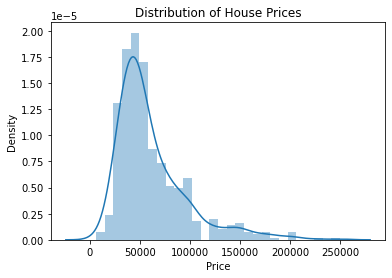

In [10]:
sns.distplot(df['Price'])
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.show()

<AxesSubplot:>

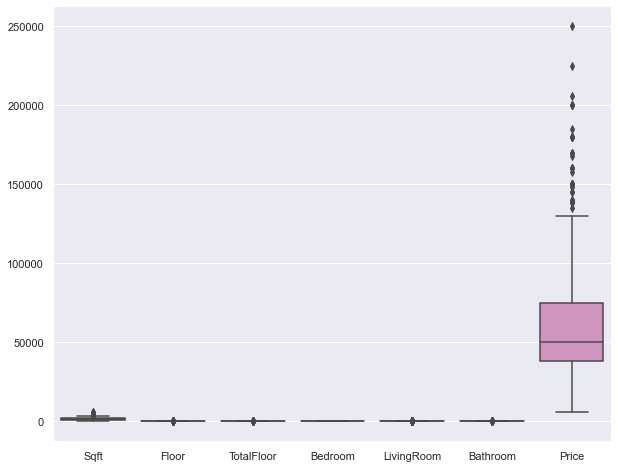

In [11]:
sns.set(rc ={'figure.figsize' :(10,8)})
sns.boxplot(data=df)

<AxesSubplot:xlabel='Bedroom', ylabel='Price'>

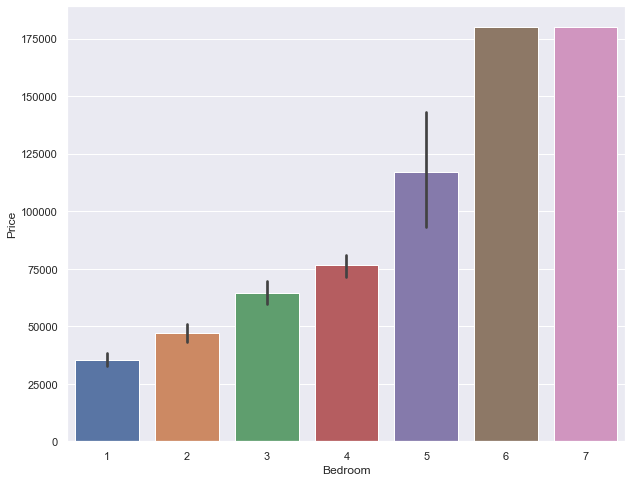

In [12]:
sns.barplot(data=df,x='Bedroom',y='Price')

<AxesSubplot:xlabel='Sqft', ylabel='Price'>

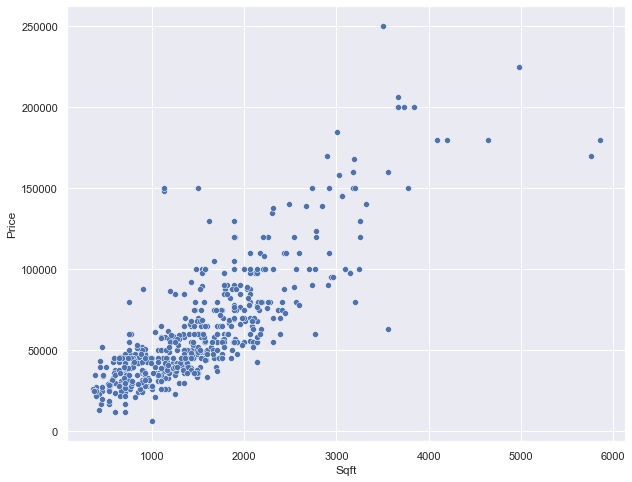

In [13]:
sns.scatterplot(data=df,x='Sqft',y='Price')

In [14]:
x = df.drop(['Price'],axis=1)
y = df['Price']

In [15]:
print(x.shape)
print(y.shape)

(579, 6)
(579,)


In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 3)

In [17]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

         Sqft  Floor  TotalFloor  Bedroom  LivingRoom  Bathroom
130  1529.940      6          12        3           2         2
362  1191.930      3           7        3           2         2
357  2383.860      2           7        3           2         2
211   384.264      2           9        1           1         1
587   676.020      6           7        2           1         1
..        ...    ...         ...      ...         ...       ...
533  1974.690      6          17        4           2         2
468   925.080      7          10        1           2         1
124  2543.970      9          12        3           2         2
280   359.358     12          12        1           1         1
273   533.700      7          12        1           1         1

[463 rows x 6 columns]
         Sqft  Floor  TotalFloor  Bedroom  LivingRoom  Bathroom
138  2558.202      2          10        3           2         2
505  1102.980      3           7        3           2         2
578  5760.402   

In [18]:
rmse_val = []
for K in range(1,10):
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    error = np.sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    print('RMSE value for k = ', K, 'is : ', error)

RMSE value for k =  1 is :  21742.202851311693
RMSE value for k =  2 is :  21929.88129925853
RMSE value for k =  3 is :  21004.1347479618
RMSE value for k =  4 is :  20094.36954043024
RMSE value for k =  5 is :  20055.82483576177
RMSE value for k =  6 is :  20366.809119002777
RMSE value for k =  7 is :  20171.19565876518
RMSE value for k =  8 is :  20250.158909710673
RMSE value for k =  9 is :  20035.886380918415


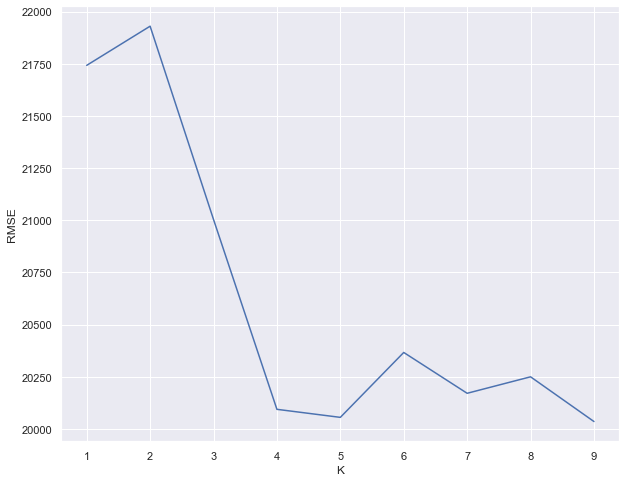

In [19]:
k_range = range(1,10)
plt.plot(k_range, rmse_val)
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()

In [20]:
model = KNeighborsRegressor(n_neighbors = 5)
model.fit(x_train,y_train)
pred = model.predict(x_test)
error = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE : ', error)

RMSE :  20055.82483576177
